# Intro Figure

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from htc.fonts.set_font import set_font
from htc.models.image.DatasetImage import DatasetImage
from htc.settings_seg import settings_seg
from htc.tivita.DataPath import DataPath
from htc.utils.Config import Config

set_font()

In [2]:
paths = [DataPath.from_image_name("P044#2020_02_01_09_51_31")]
rgb = DatasetImage(paths, train=False, config=Config({"input/n_channels": 3}))[0]["features"]
param = DatasetImage(
    paths, train=False, config=Config({"input/n_channels": 4, "input/preprocessing": "parameter_images"})
)[0]["features"]

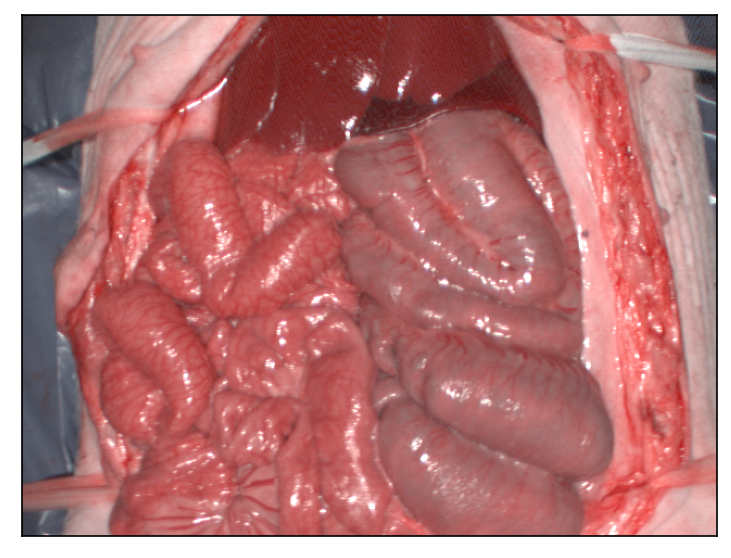

In [3]:
fig, ax = plt.subplots(1, 1, dpi=150, tight_layout=True)
ax.imshow(rgb)
ax.axes.yaxis.set_visible(False)
ax.axes.xaxis.set_visible(False)
plt.savefig(settings_seg.paper_dir / "sample_rgb.pdf");

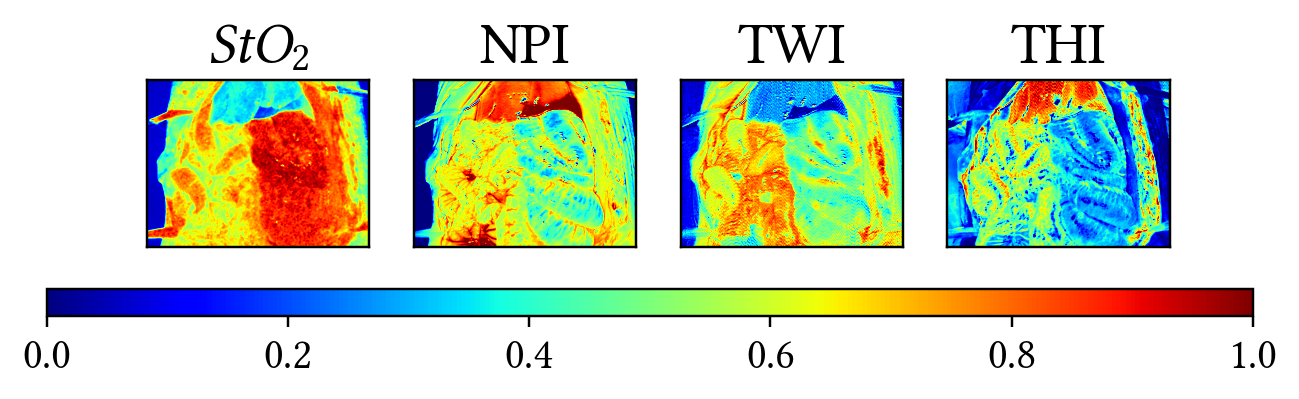

In [4]:
fig, axes = plt.subplots(1, 4, dpi=220)
param_names = ["$StO_2$", "NPI", "TWI", "THI"]

for i, ax in enumerate(axes.flatten()):
    ax.imshow(param[:, :, i], cmap="jet")
    ax.axes.yaxis.set_visible(False)
    ax.axes.xaxis.set_visible(False)
    ax.set_title(param_names[i])

cbaxes = fig.add_axes([0.049, 0.33, 0.914, 0.03])
fig.colorbar(cm.ScalarMappable(norm=Normalize(0, 1), cmap="jet"), cax=cbaxes, orientation="horizontal")
plt.savefig(settings_seg.paper_dir / "sample_params.pdf", bbox_inches="tight");